In [2]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [3]:
using Revise
using Turing
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [4]:
include("../VARs/utils.jl")
includet("../bootstrap_model.jl")

In [30]:
df = DataFrame(XLSX.readtable("../../data/usa_var_data.xlsx", "Data", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :Date), Dates.quarter, last)

freq = 4
returns = percentchange(data_source[:Total_Stock, :Price_10Y], :log)
cpi = percentchange(data_source[:CPI], :log)
real_returns = returns .- cpi
start = Date(1955, 01,01)
end_d = Date(2024, 12, 31)

yeld_diff = diff(data_source[:Yeld_10Y])

initial_yeld = values(last(data_source[:Yeld_10Y]))

1-element Vector{Float64}:
 0.0409

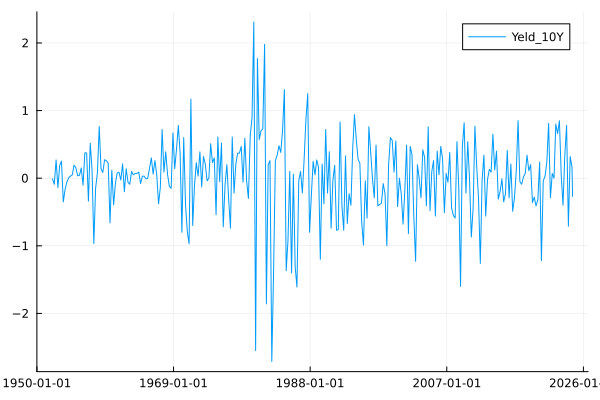

In [24]:
using Plots

plot(yeld_diff .* 100)

In [ ]:
data = to(from(yeld_diff, start),end_d) 
data = collect(reshape(values(data), (1,279))')
assets_names = [:Yeld_diff]

scenarios = block_bootstrap(data, 10_000, block_size=60, random_block=true)

scenarios[1,1,:] + initial_yeld


MethodError: MethodError: no method matching +(::Vector{Float64}, ::TimeArray{Float64, 1, Date, Vector{Float64}})
The function `+` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  +(!Matched::ChainRulesCore.NotImplemented, ::Any)
   @ ChainRulesCore C:\Users\matsz\.julia\packages\ChainRulesCore\U6wNx\src\tangent_arithmetic.jl:24
  +(::Any, !Matched::ChainRulesCore.NotImplemented)
   @ ChainRulesCore C:\Users\matsz\.julia\packages\ChainRulesCore\U6wNx\src\tangent_arithmetic.jl:25
  ...


In [ ]:

periods = [1,5, 10, 25]
ret_in_years = cum_returns_in_periods(scenarios, periods, freq, true)
print_scenarios_summary(ret_in_years, assets_names, string.(periods))
n_assets = length(assets_names)
for a in 1:n_assets
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, .025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  


In [7]:
mdd, mddl = max_drawdown_and_length(scenarios[1,:,:])

display(assets_names[1])
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

mdd, mddl = max_drawdown_and_length(scenarios[2,:,:])

display(assets_names[2])
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

:Total_Stock_CPI

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.376926  0.499561  0.516744  0.56925  0.70339

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 58.0  102.0  144.0  185.0  339.03

:Price_10Y_CPI

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.19893  0.376498  0.432131  0.496277  0.649711

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 84.0  161.0  235.0  348.0  688.03